<a href="https://colab.research.google.com/github/ElenaBobro/hoom-work2-/blob/main/%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%964_Pandas_%2B_SQL_ipynb%22LB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [43]:
!pip install mysql-connector-python

In [44]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

In [45]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [46]:
sql = """
SELECT YEAR(hire_date) as hire_year, COUNT(*) as employee_count
FROM employees
GROUP BY hire_year
ORDER BY hire_year ASC;
"""

In [47]:
import pandas as pd

In [48]:
import warnings

warnings.filterwarnings('ignore')

In [49]:
df = pd.read_sql(sql, con)
print(df);

    hire_year  employee_count
0        1985           35316
1        1986           36150
2        1987           33501
3        1988           31436
4        1989           28394
5        1990           25610
6        1991           22568
7        1992           20402
8        1993           17772
9        1994           14835
10       1995           12115
11       1996            9574
12       1997            6669
13       1998            4155
14       1999            1514
15       2000              13


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [50]:
import matplotlib.pyplot as plt

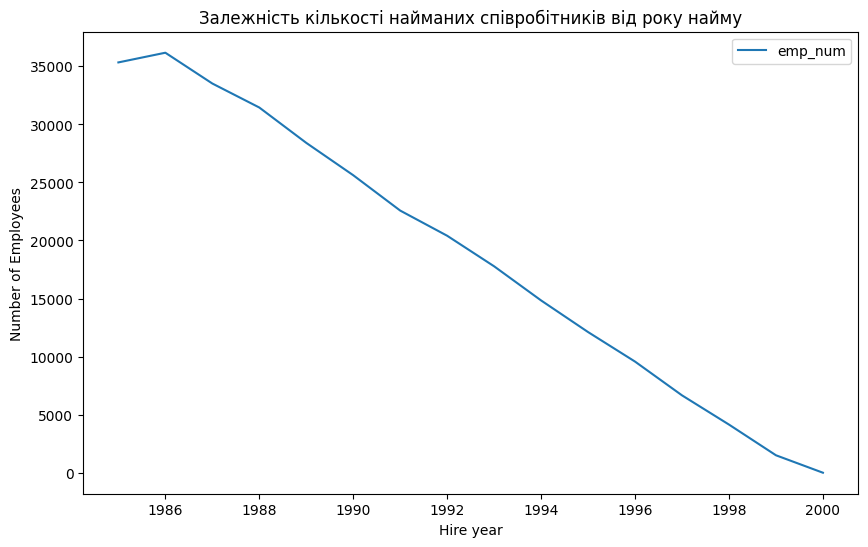

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(df['hire_year'], df['employee_count'], label='emp_num')
plt.title('Залежність кількості найманих співробітників від року найму')
plt.xlabel('Hire year')
plt.ylabel('Number of Employees')
plt.legend()
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [52]:
years = """
SELECT
    TIMESTAMPDIFF(YEAR, from_date, to_date) as duration,
    from_date,
    to_date
FROM titles
WHERE title = 'Engineer' AND to_date != '9999-01-01';
"""

In [53]:
df_years = pd.read_sql(years, con)
print(df_years);

       duration   from_date     to_date
0             9  1986-12-01  1995-12-01
1             5  1990-02-18  1995-02-18
2             8  1992-12-18  2000-12-18
3             8  1987-04-03  1995-04-03
4             5  1995-03-20  2001-03-19
...         ...         ...         ...
84015         9  1989-11-23  1998-11-23
84016         5  1989-07-30  1994-07-30
84017         0  1993-02-22  1993-10-27
84018         6  1996-05-13  2002-05-13
84019         4  1987-08-30  1992-08-29

[84020 rows x 3 columns]


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

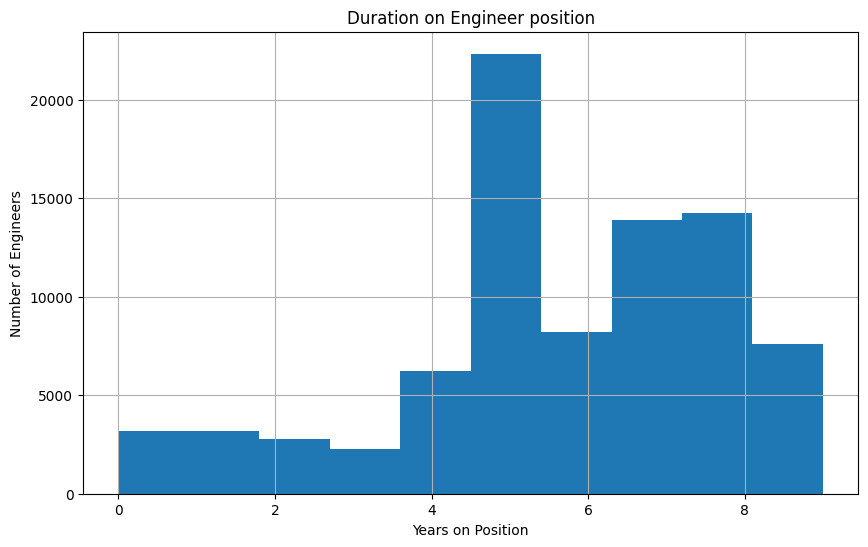

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df_years['duration'])
plt.title('Duration on Engineer position')
plt.xlabel('Years on Position')
plt.ylabel('Number of Engineers')
plt.grid(True)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [55]:
con.close()